In [2]:
import os

In [20]:
import pickle
import numpy as np, matplotlib.pyplot as plt

with open("six_landmarks_hundred_seeds_results", 'rb') as f: 
 (META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

In [22]:
def all_info_for_approach(META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS, approach):
    
    # plot the ROC curve 

    average_tprs = np.mean(np.array(AVERAGE_TPRS), axis = 0)
    meta_avg_tpr = np.mean(average_tprs, axis = 0) 
    base_fpr = np.linspace(0, 1, 101) 
    
    plt.plot(base_fpr, average_tprs, label = "average of runs")

    std_tpr = np.std(AVERAGE_TPRS, axis=0)
    tprs_upper = np.minimum(np.mean(AVERAGE_TPRS,axis=0) + std_tpr, 1)
    tprs_lower = np.maximum(np.mean(AVERAGE_TPRS,axis=0) - std_tpr, 0)
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3, label=r'$\pm$ 1 std. dev.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = "chance")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{approach} Average ROC Curve')
    plt.legend(loc="lower right")

    plt.savefig(f"seed_plots/{approach} ROC Curve")

    plt.show()


    # receive evaluation for basically everything
    METRICS = []
    for fold_results in np.array_split(META_RESULT_MATRIX, 100):
        """cluster based on cross validtion run"""
        METRICS.append(np.mean(fold_results, axis = 0)) 

    METRICS = np.around(np.array(METRICS), 3)
    print(f"training accuracy : {np.mean(METRICS[:, 0])} +/- {np.std(METRICS[:, 0])}")
    print(f"training precision : {np.mean(METRICS[:, 1])} +/- {np.std(METRICS[:, 1])}")
    print(f"training recall : {np.mean(METRICS[:, 2])} +/- {np.std(METRICS[:, 2])}")
    print(f"training f1 : {np.mean(METRICS[:, 3])} +/- {np.std(METRICS[:, 3])}")
    print(f"validation accuracy : {np.mean(METRICS[:, 4])} +/- {np.std(METRICS[:, 4])}")
    print(f"validation precision : {np.mean(METRICS[:, 5])} +/- {np.std(METRICS[:, 5])}")
    print(f"validation recall : {np.mean(METRICS[:, 6])} +/- {np.std(METRICS[:, 6])}")
    print(f"validation f1 : {np.mean(METRICS[:, 7])} +/- {np.std(METRICS[:, 7])}")
    print(f"average auroc : {np.mean(AVERAGE_AUROCS)} +/- {np.std(AVERAGE_AUROCS)}")

In [23]:
np.array(META_RESULT_MATRIX).shape

(500, 8)

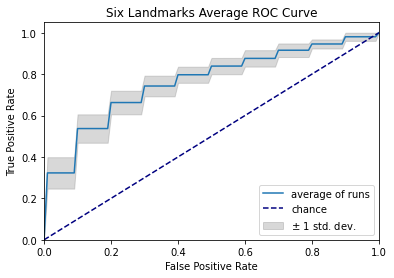

training accuracy : 0.76814 +/- 0.01951052023909154
training precision : 0.7872999999999998 +/- 0.028943565778942987
training recall : 0.7472 +/- 0.03500228563965503
training f1 : 0.7622599999999998 +/- 0.021019333957097708
validation accuracy : 0.6955 +/- 0.02703238798182652
validation precision : 0.7171900000000001 +/- 0.034962750177867874
validation recall : 0.6749999999999998 +/- 0.055090834083357264
validation f1 : 0.6828500000000001 +/- 0.035929201215724224
average auroc : 0.76189 +/- 0.026550118867552906


In [25]:
all_info_for_approach(META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS, approach = "Six Landmarks")

In [4]:
import numpy as np, matplotlib.pyplot as plt

def plot_roc_auroc(base_fpr, TPRs, FPRs, aurocs): 
    

    for i, (tpr, fpr) in enumerate(zip(TPRs, FPRs)): 
        plt.plot(base_fpr, tpr, label = f"fold {i + 1}")

    mean_tpr = np.mean(TPRs, axis=0)
    plt.plot(base_fpr, mean_tpr, label = "average of folds")
    
    std_tpr = np.std(TPRs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3,
                 label=r'$\pm$ 1 std. dev.')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = "chance")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve across folds')
    plt.legend(loc="lower right")
    plt.show()

    # plot the auroc curves 
    mean_auroc = sum(aurocs) / len(aurocs)
    descriptions = [f"fold {i + 1}" for i in range(len(aurocs))] + ["average fold"]
    aurocs.append(mean_auroc)
    plt.bar(descriptions, aurocs, color = "green")
    plt.xlabel("Fold")
    plt.ylabel("Area Under Curve")
    plt.title("Area Under ROC Curve across folds")
    plt.show() 

    return mean_tpr, mean_auroc

def plot_meta_roc_auroc(average_aurocs, average_tprs, base_fpr): 
    meta_avg_tpr = np.mean(average_tprs, axis = 0) 
    meta_avg_auroc = sum(average_aurocs) / len(average_aurocs)
    
    for i, average_tpr in enumerate(average_tprs): 
        plt.plot(base_fpr, average_tpr, label = f"run {i + 1}")
    
    plt.plot(base_fpr, meta_avg_tpr, label = "average of runs")
    
    std_tpr = np.std(average_tprs, axis=0)
    tprs_upper = np.minimum(meta_avg_tpr + std_tpr, 1)
    tprs_lower = np.maximum(meta_avg_tpr - std_tpr, 0)
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3, label=r'$\pm$ 1 std. dev.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = "chance")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Average ROC Curve across Runs (No Aug)')
    plt.legend(loc="lower right")
    plt.show()

    descriptions = [f"{i + 1}" for i in range(len(average_aurocs))] + ["avg"]
    average_aurocs.append(meta_avg_auroc)
    plt.bar(descriptions, average_aurocs, color = "green")
    plt.xlabel("Run Number")
    plt.ylabel("Area Under Curve")
    plt.title("Area Under ROC Curve across Runs (No Aug)")
    plt.show()

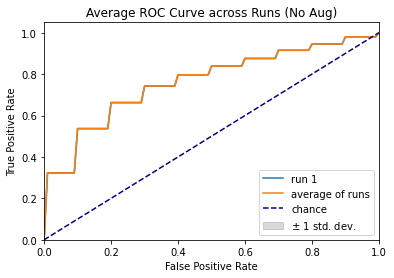

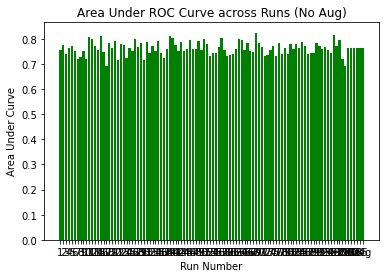

In [42]:
plot_meta_roc_auroc(AVERAGE_AUROCS,  [np.mean(np.array(AVERAGE_TPRS), axis = 0)], np.linspace(0, 1, 101))